<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 12th exercise: <font color="#C70039">Deep Learning Basics: Preprocessing, Encoding and Initial Setup</font>
* Course: <a href="https://www.gernotheisenberg.de/time_series_forecasting.html">Time Series Forecasting (TSF)</a>
* Lecturer: <a href="https://www.gernotheisenberg.de/uebermich.html">Gernot Heisenberg</a>
* Date:   23.03.2025

<img src="./images/DL1.jpg" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION OF THE NOTEBOOK CONTENT</font>:
This notebook allows you for learning about the initial first steps, including data preprocessing and especially data encoding when planning to forecast a time series by Deep Learning approaches. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. Prepare a data set for DL and perform preprocessing
    * Download data set from the UCI Machine Learning Repository:
        * https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data.
    * Read the data and plot the target
    * Remove unnecessary columns
    * Identify whether there is daily seasonality and encode the time accordingly 
    * Split your data into training, validation and testing sets.
    * Scale the data using MinMaxScaler.
    * Save the train, validation and test sets to be used later.
-----------------------------------------------------------------------------------

# PART I - Data Preprocessing

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [46]:
df = pd.read_csv('./data/DL/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [47]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [48]:
df = df.drop_duplicates(subset='date_time', ignore_index=True)

In [49]:
df.shape

(40575, 9)

In [50]:
date_range = list(pd.date_range('2012-10-02 09:00:00', '2018-09-30 23:00:00', freq='H'))
print(len(date_range))

52551


In [51]:
new_df = pd.DataFrame({'date_time': date_range})
new_df.head()

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


In [8]:
full_df = pd.merge(new_df, df, how='left', on='date_time')

In [9]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40.0,Clouds,scattered clouds,5545.0
1,2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75.0,Clouds,broken clouds,4516.0
2,2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90.0,Clouds,overcast clouds,4767.0
3,2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90.0,Clouds,overcast clouds,5026.0
4,2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75.0,Clouds,broken clouds,4918.0


In [10]:
full_df.isna().sum()

date_time                  0
holiday                52498
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
traffic_volume         11976
dtype: int64

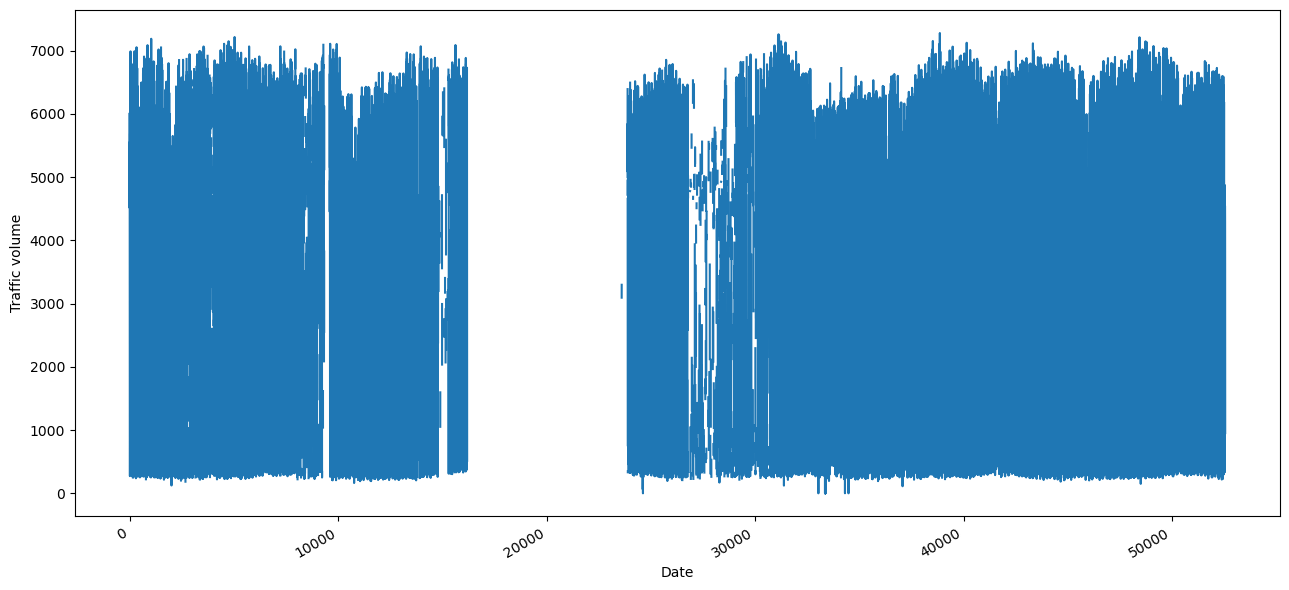

In [11]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

In [12]:
full_df[35000:].isna().sum()

date_time                  0
holiday                17529
temp                     104
rain_1h                  104
snow_1h                  104
clouds_all               104
weather_main             104
weather_description      104
traffic_volume           104
dtype: int64

In [13]:
full_df = full_df[35000:].reset_index(drop=True)

In [14]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2016-09-29 17:00:00,NaN,291.75,0.0,0.0,0.0,Clear,Sky is Clear,5551.0
1,2016-09-29 18:00:00,NaN,290.36,0.0,0.0,0.0,Clear,Sky is Clear,4132.0
2,2016-09-29 19:00:00,NaN,287.86,0.0,0.0,0.0,Clear,Sky is Clear,3435.0
3,2016-09-29 20:00:00,NaN,285.91,0.0,0.0,0.0,Clear,Sky is Clear,2765.0
4,2016-09-29 21:00:00,NaN,284.31,0.0,0.0,0.0,Clear,Sky is Clear,2443.0


In [15]:
full_df = full_df.drop(['holiday', 'weather_main', 'weather_description'], axis=1)
full_df.shape

(17551, 6)

In [16]:
full_df = full_df.fillna(full_df.groupby(full_df.date_time.dt.hour).transform('median'))

In [17]:
full_df.isna().sum()

date_time         0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
traffic_volume    0
dtype: int64

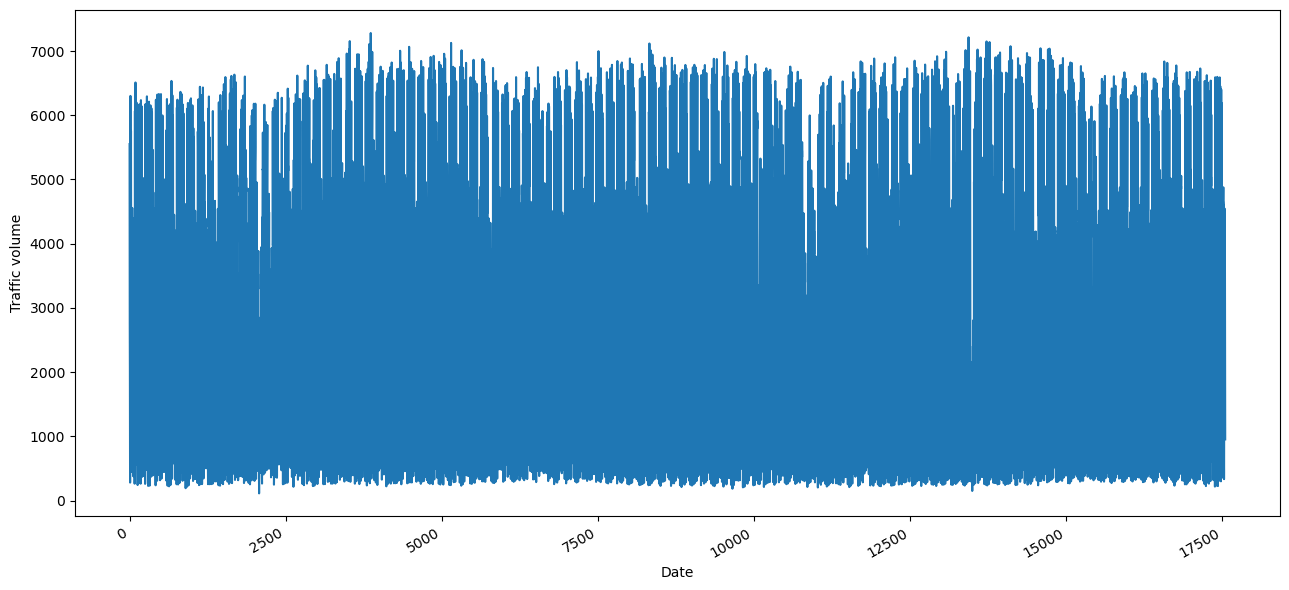

In [18]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

In [19]:
full_df.to_csv('./data/DL/metro_interstate_traffic_volume_preprocessed.csv', index=False, header=True)

# PART II - Data Encodings

In [20]:
# load all remaining libs that have not been loaded in the first import section
import datetime

import seaborn as sns
import tensorflow as tf

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

In [21]:
# useful settings
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [22]:
tf.random.set_seed(42)
np.random.seed(42)

In [23]:
df = pd.read_csv('./data/DL/metro_interstate_traffic_volume_preprocessed.csv')
df.head()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0.0,0.0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0.0,0.0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0.0,0.0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0.0,0.0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0.0,0.0,2443.0


In [24]:
df.tail()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
17546,2018-09-30 19:00:00,283.45,0.0,0.0,75.0,3543.0
17547,2018-09-30 20:00:00,282.76,0.0,0.0,90.0,2781.0
17548,2018-09-30 21:00:00,282.73,0.0,0.0,90.0,2159.0
17549,2018-09-30 22:00:00,282.09,0.0,0.0,90.0,1450.0
17550,2018-09-30 23:00:00,282.12,0.0,0.0,90.0,954.0


In [25]:
df.shape

(17551, 6)

#### Visualization section
Visualize the evolution of the traffic volume over time. 
Since the dataset is very large, with more than 17,000 records, plot only the first 400 data points,
which is roughly equivalent to two weeks of data.

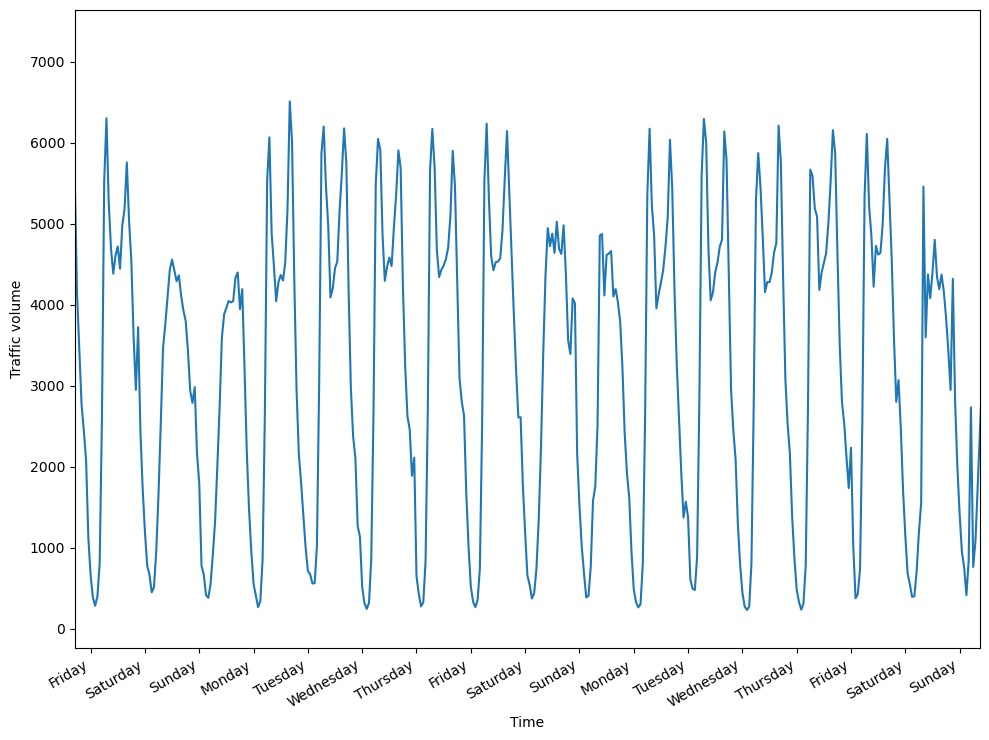

In [27]:
fig, ax = plt.subplots()

ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)# plot the first 400 data points only 

fig.autofmt_xdate()
plt.tight_layout()

Notice a clear daily seasonality, since the traffic volume is lower at the start and end of each day.
Also see a smaller traffic volume during the weekends. 

As for the trend, two weeks of data (0:400) is likely insufficient to draw a reasonable conclusion but it seems that the volume is neither increasing nor decreasing
over time in the figure.

Also plot the hourly temperature, as it will be a target for the multi-output models. Here, we will expect to see both yearly and daily seasonality.

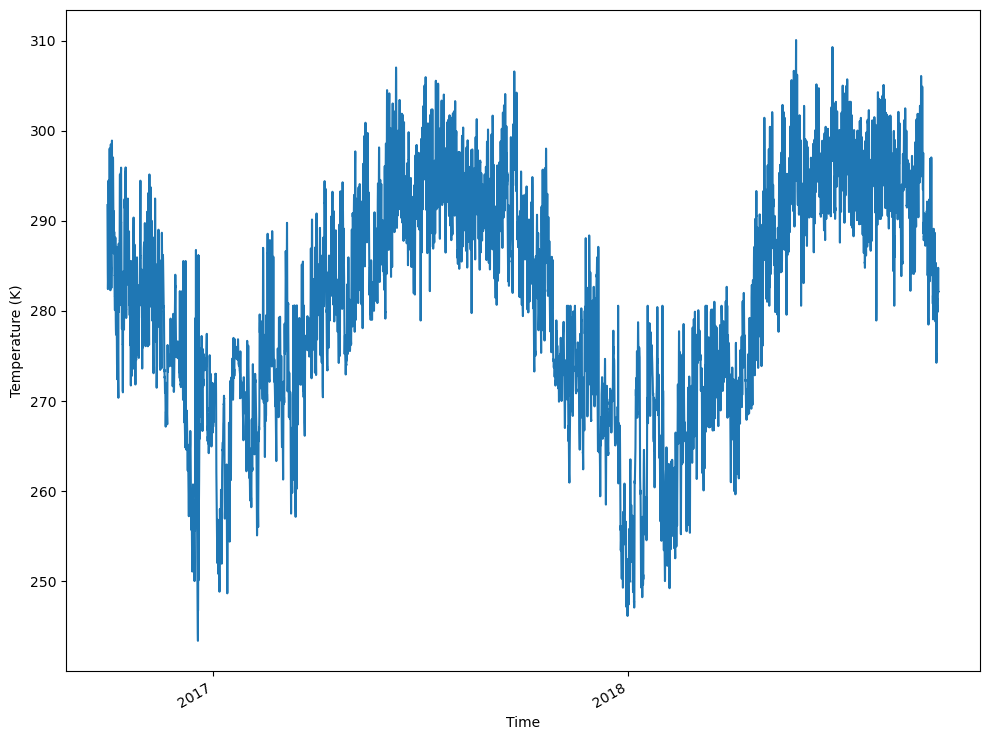

In [28]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

Visualize the first two weeks again, which is the first 400 values.

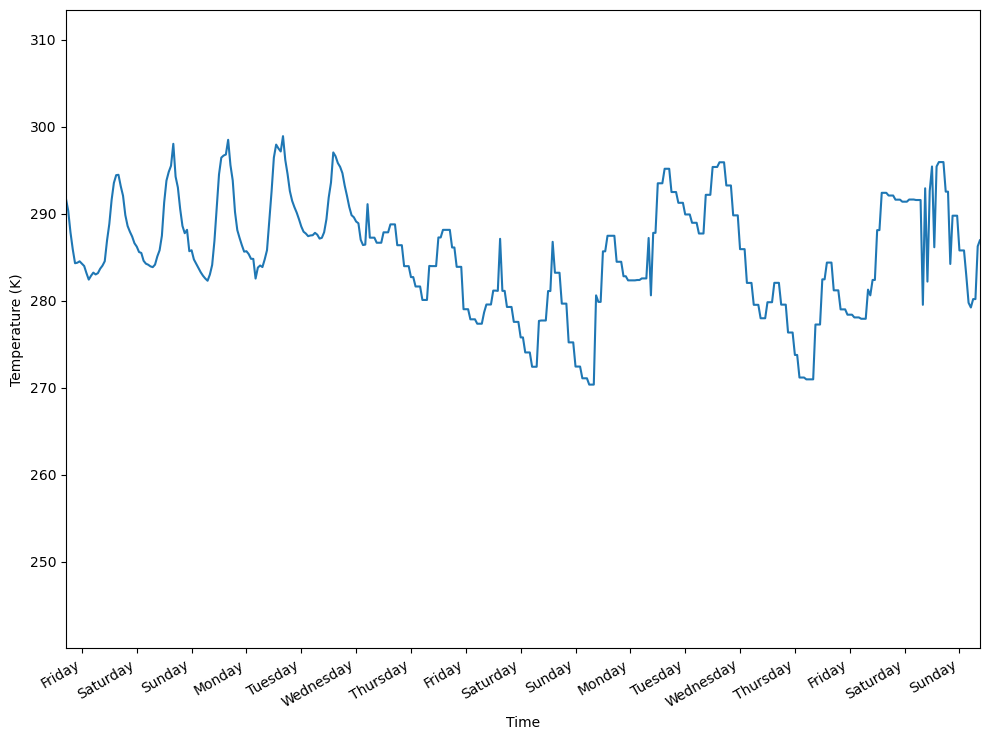

In [30]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400) # two week again

fig.autofmt_xdate()
plt.tight_layout()


The yearly seasonality in the plot (upper one) should be due to the seasons in the year, while the daily seasonality (lower one) will be due to the fact that temperatures tend to be lower at night and higher during the day, although the data is a bit noisy.

#### Feature engineering and data splitting

Use the describe method in order to get a good overview.

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


##### <u>Remove unusable features</u>

From the output, you’ll notice that rain_1h is mostly 0 throughout the dataset, as its third quartile is still at 0. Since at least 75% of the values for rain_1h are 0, it is unlikely that it is a strong predictor of traffic volume. Thus, this feature will be removed. 

Looking at snow_1h, you’ll notice that this variable is at 0 through the entire dataset. This is easily observable, since its minimum and maximum values are both 0.
Thus, this is not predictive of the variation in traffic volume over time. This feature will also be removed from the dataset.

In [33]:
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)

df.shape

(17551, 4)

##### <u>Enconding of the time</u>

Right now, the date_time feature is not usable by the models, since it is a datetime string. Thus convert it into a numerical value.
A simple way to do that is to express the date as a number of seconds. This is achieved through the use of the timestamp method from the datetime library.

<font color = red>NOTE:</font>
However, this leads us to losing the cyclical nature of time, because the number of seconds simply increases linearly with time.

Therefore, we must apply a transformation to recover the cyclical behavior of time. A simple way to do that is to apply a sine transformation. We know that the
sine function is cyclical, bounded between –1 and 1. This will help us regain part of the cyclical property of time.

However, we need to confirm the seasonality cycle in the data. For this purpose we will use the power spectrum visualization by means of a Fast Fourier Transformation (FFT). This FFT maps the time series into the frequency space and plots the absolute frequenvy (absolute Häufigkeit) over the time frequency in the data.

In [34]:
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

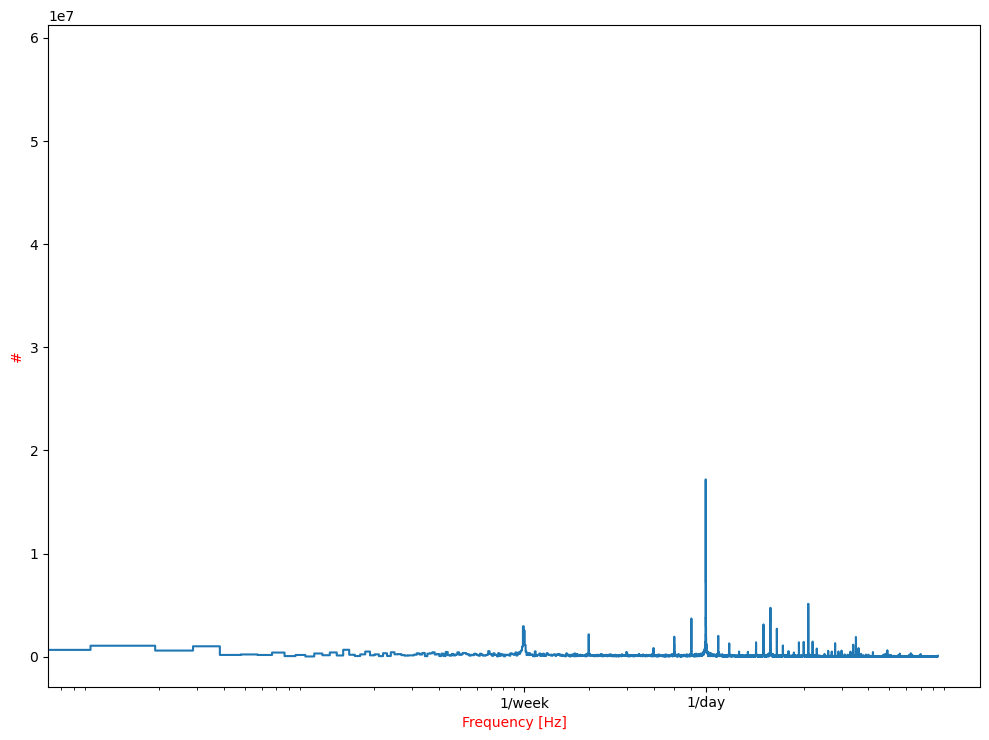

In [35]:
fft = tf.signal.rfft(df['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['traffic_volume'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency [Hz]', color ='r')
plt.ylabel('#', color ='r')
plt.tight_layout()
plt.show()

The amplitude of the weekly and daily seasonality is clearly visible in our target. We can see that the amplitude of the weekly seasonality is lower than the daily seasonality peak. 
Therefore, we indeed have daily seasonality for our target.

#### Applying the sine / cosine encoding

With a single sine transformation, we regain some of the cyclical property that was lost when converting to seconds. 
However, at this point, 12 p.m. is equivalent to 12 a.m., and 5 p.m. is equivalent to 5 a.m.

This is undesired, as we want to distinguish between morning and afternoon. 

Thus, we’ll apply a cosine transformation. We know that cosine is out of phase with the sine function. This allows us to distinguish between 5 a.m. and 5 p.m., 
expressing the cyclical nature of time in a day. 

After that, we can remove the date_time column from the df, since it is not needed anymore.

In [36]:
# The timestamp is in seconds, so we must calculate the number of seconds in a day
# before applying the sine/cosine transformation.
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

In [37]:
df = df.drop(['date_time'], axis=1)

df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0.0,5551.0,-0.707107,-7.071068e-01
1,290.36,0.0,4132.0,-0.866025,-5.000000e-01
2,287.86,0.0,3435.0,-0.965926,-2.588190e-01
3,285.91,0.0,2765.0,-1.000000,-4.048636e-12
4,284.31,0.0,2443.0,-0.965926,2.588190e-01


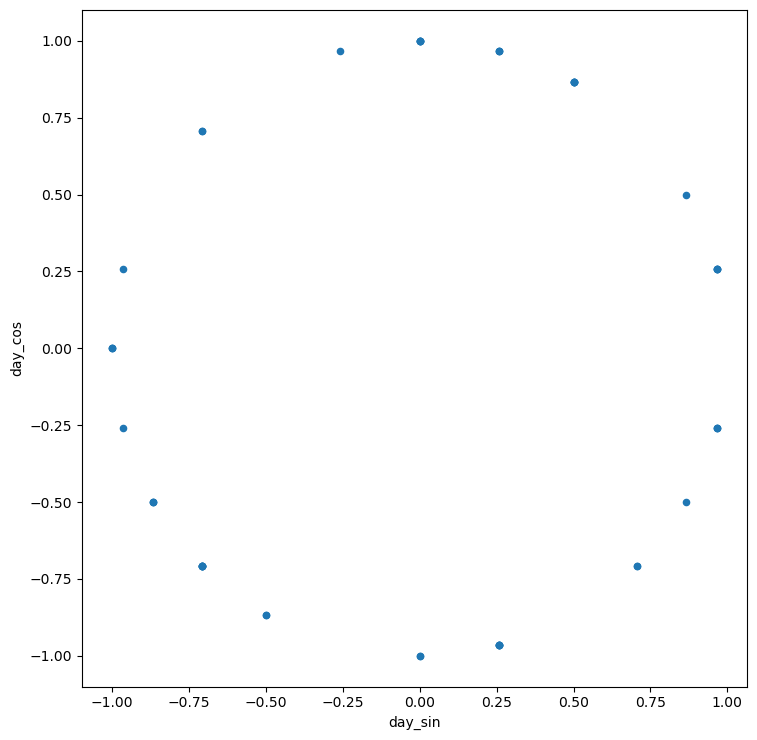

In [38]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

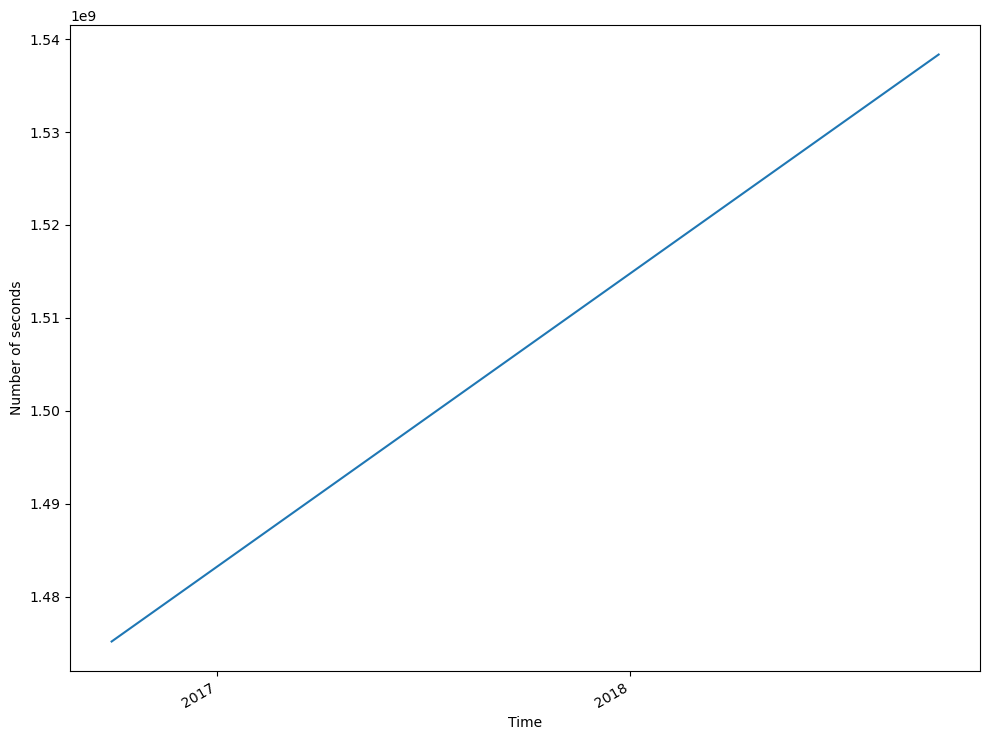

In [39]:
# here the old timestamp in seconds encoding
fig, ax = plt.subplots()

ax.plot(timestamp_s)
ax.set_xlabel('Time')
ax.set_ylabel('Number of seconds')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

### Data split (train, val, test)

In [40]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((12285, 5), (3510, 5), (1756, 5))

##### Scale all feature to be between 0 and 1

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

In [42]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,12285.0,0.555681,0.196527,0.0,0.424800,0.557913,0.715072,1.0
clouds_all,12285.0,0.431034,0.393716,0.0,0.010000,0.400000,0.900000,1.0
traffic_volume,12285.0,0.445735,0.273635,0.0,0.165899,0.473141,0.671271,1.0
day_sin,12285.0,0.500020,0.353600,0.0,0.146447,0.500000,0.853553,1.0
day_cos,12285.0,0.500035,0.353536,0.0,0.146447,0.500000,0.853553,1.0


In [43]:
train_df.to_csv('./data/DL/train.csv')
val_df.to_csv('./data/DL/val.csv')
test_df.to_csv('./data/DL/test.csv')

In [44]:
test_df

,temp,clouds_all,traffic_volume,day_sin,day_cos
15795,0.767405,0.90,0.401563,0.000000,0.500000
15796,0.756876,0.90,0.348821,0.017037,0.629410
15797,0.754833,0.90,0.302637,0.066987,0.750000
15798,0.754833,0.90,0.187108,0.146447,0.853553
15799,0.756247,0.90,0.080926,0.250000,0.933013
...,...,...,...,...,...
17546,0.629577,0.75,0.478582,0.017037,0.370590
17547,0.618733,0.90,0.372262,0.000000,0.500000
17548,0.618262,0.90,0.285475,0.017037,0.629410
17549,0.608204,0.90,0.186549,0.066987,0.750000
